# Trading Research Notebook

Research and analysis for trading strategies


In [1]:
# Install packages in the notebook environment
# Use %pip (recommended) or !pip - both will install to the kernel's Python
# %pip install pandas numpy matplotlib seaborn

# Import common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully")


Libraries imported successfully


## Installing Packages

To install packages in this notebook environment, use one of these methods:

**Method 1 (Recommended):** Use the `%pip` magic command
```python
%pip install package-name
```

**Method 2:** Use `!pip install` 
```python
!pip install package-name
```

**Method 3:** Install from requirements.txt
```python
%pip install -r requirements.txt
```

**Note:** Both `%pip` and `!pip` will install packages to the Python environment that the kernel is using (your venv).


In [7]:
# Import IBKR data fetcher
import asyncio
import importlib

# Reload config and ibkr_data_async to pick up any changes (important if you modified config.py)
import config
importlib.reload(config)
import ibkr_data_async
importlib.reload(ibkr_data_async)
from ibkr_data_async import DataFetcherAsync
from config import IBKR_HOST, IBKR_PORT, IBKR_CLIENT_ID

# Verify the port being used
print(f"Connecting to IBKR at {IBKR_HOST}:{IBKR_PORT}")
print(f"Client ID: {IBKR_CLIENT_ID}")

# Set your tickers and years here
tickers = ["AAPL", "NVDA", "TSM"]
years = 5
force_refresh = False  # Set to True to bypass cache and re-download

# Initialize and connect (explicitly pass port to avoid caching issues)
fetcher = DataFetcherAsync(
    host=IBKR_HOST,
    port=IBKR_PORT,  # This will use the reloaded config value
    client_id=IBKR_CLIENT_ID
)

# Connect to IBKR (make sure TWS/Gateway is running!)
await fetcher.connect()
print("Connected to IBKR!")

# Fetch data for multiple tickers
all_data = await fetcher.fetch_all_tickers_data(
    tickers=tickers,
    years=years,
    force_refresh=force_refresh,
    max_concurrent=5
)

# Display results
for ticker, df in all_data.items():
    if df is not None:
        print(f"\n{ticker}:")
        print(f"  Shape: {df.shape}")
        print(f"  Date range: {df.index.min()} to {df.index.max()}")
        print(f"  First few rows:")
        print(df.head())

# Disconnect when done
fetcher.ib.disconnect()
print("\nDisconnected from IBKR")



Connecting to IBKR at 127.0.0.1:7496
Client ID: 1
Connected to IBKR!

AAPL:
  Shape: (1255, 8)
  Date range: 0 to 1254
  First few rows:
         date    open    high     low   close      volume     average  \
0  2020-11-16  115.72  117.78  115.00  117.11  69437853.0  116.904812   
1  2020-11-17  116.36  117.48  115.80  116.22  57612897.0  116.761715   
2  2020-11-18  115.46  116.64  114.87  114.90  57293259.0  115.893395   
3  2020-11-19  114.55  115.90  113.71  115.49  57906640.0  114.842067   
4  2020-11-20  115.49  115.62  114.18  114.22  55881105.0  114.932598   

   barCount  
0    278055  
1    233918  
2    234250  
3    241477  
4    224552  

TSM:
  Shape: (1255, 8)
  Date range: 0 to 1254
  First few rows:
         date   open   high    low  close      volume    average  barCount
0  2020-11-16  88.64  94.13  88.54  91.22  14900234.0  91.565392     79628
1  2020-11-17  90.03  90.13  87.93  87.95   8205420.0  88.809674     48947
2  2020-11-18  90.53  90.79  88.55  89.07   6234

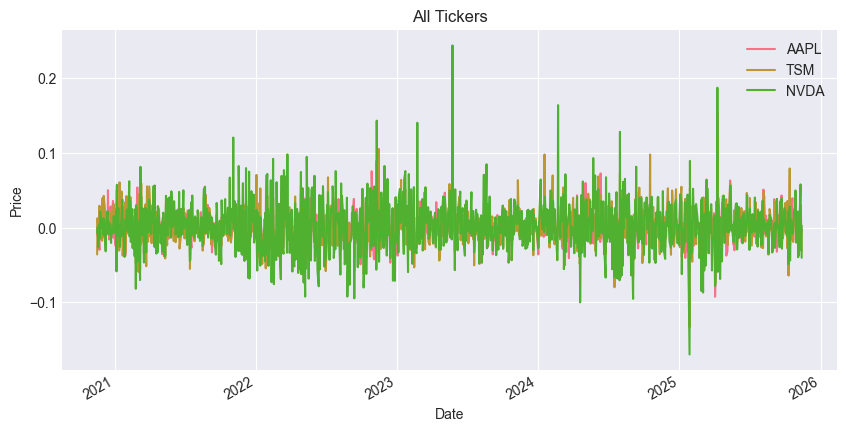

In [8]:
fig, ax = plt.subplots(figsize=(10,5))

for ticker, df in all_data.items():
    #print(ticker)
    #print(df.head(10))
    #df['return'] = np.log(df['close']).diff()
    df['return'] = df['close'].pct_change()
    ax.plot(df['date'], df['return'], label = ticker)

ax.set_title("All Tickers")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend()
ax.grid(True)
fig.autofmt_xdate()
plt.show()






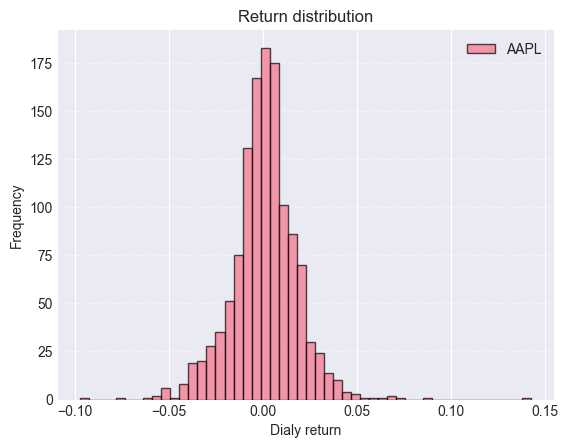

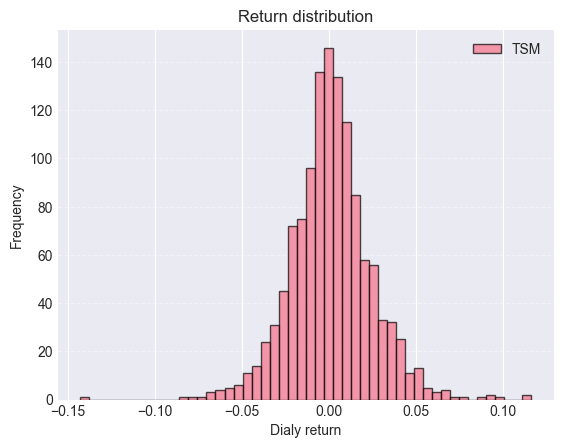

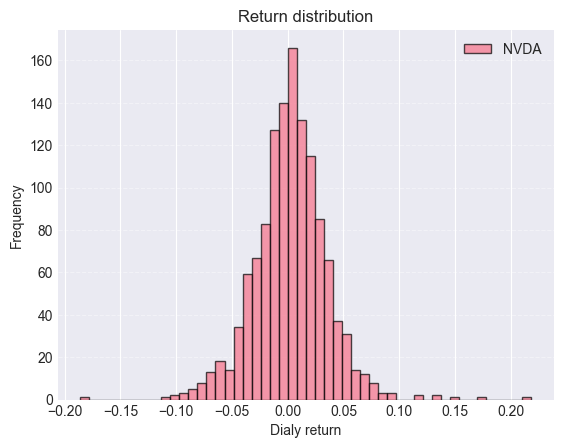

In [9]:
def cleaning_data():
    for ticker, df in all_data.items():
        df["date"] = pd.to_datetime(df["date"])
        df['returns'] = df['close'].pct_change()
        df['log_returns'] = np.log(df['close']).diff()
        df['day_of_month'] = df['date'].dt.day
    
    return all_data

cleaning_data()

for ticker, df in all_data.items():
    #print(ticker)
    #print(df.head(10))
    #df['return'] = np.log(df['close']).diff()
    returns = df['log_returns']
    plt.figure()
    plt.hist(returns, bins=50, edgecolor="black", alpha=0.7,label=ticker)
    plt.legend()
    plt.title("Return distribution")
    plt.xlabel("Dialy return")
    plt.ylabel("Frequency")
    plt.grid(True, axis="y", linestyle="--", alpha=0.4)
    plt.show()

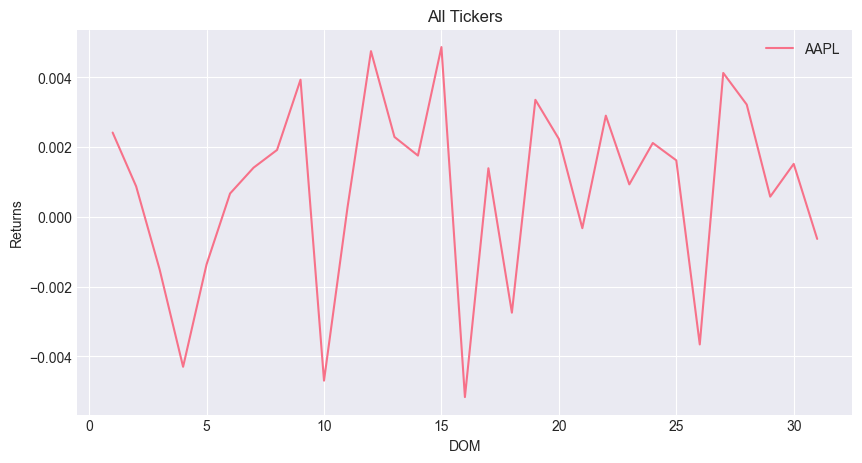

In [10]:
fig, ax = plt.subplots(figsize=(10,5))

for ticker, df in all_data.items():
    mean_returns = (df.groupby('day_of_month')["returns"]
                    .mean()
                    .sort_index()
                    )
    #print(mean_returns)
    ax.plot(mean_returns.index, mean_returns, label=ticker)


    ax.set_title("All Tickers")
    ax.set_xlabel("DOM")
    ax.set_ylabel("Returns")
    ax.legend()
    ax.grid(True)
    #fig.autofmt_xdate()
    plt.show()
